In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0006.nc')

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

H_data = H_data_40["H"].data
H_uncert_data = H_data_40["H_uncert"].data
V_uncert_dummy2d_data = H_data_40["V_uncert_dummy2d"].data
zl_uncert_data = H_data_40["zl_uncert"].data

age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert"].data

mask_age_c = np.zeros(age_c_data.shape)
for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 134000 and H_data[j, i] >= 2000.0:
                mask_age_c[kc, j, i] = 1.0

In [3]:
sicopolis_dir = '/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneAll_mini'
simulation = 'grl40_bm5_paleo17a_CT4_BH0_AC_BM5_ZLC_m11ka_pkp'

dict_sico_out_folder_prefixes = {"nodiff": "N",
                                 "tlm": "FORWARD",
                                 "adj": "ADJOINT",
                                 "tlm_action": "FORWARDHESSACTION",
                                 "adj_action": "ADJHESSACTION"}
dict_ad_exec_cmds_suffixes = {"nodiff": "nodiff",
                              "tlm": "forward",
                              "adj": "adjoint",
                              "tlm_action": "forwardhessaction",
                              "adj_action": "adjointhessaction"}
dict_ad_log_file_suffixes = {"nodiff": "nodiff",
                             "tlm": "tlm",
                             "adj": "adj",
                             "tlm_action": "tlm_hessaction",
                             "adj_action": "adj_hessaction"}
dict_ad_nc_suffixes = {"nodiff": "nodiff",
                       "tlm": "tlm",
                       "adj": "adj",
                       "tlm_action": "tlm_hessaction",
                       "adj_action": "adj_hessaction"}

KCMAX = 80
exp_sigma_level = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./KCMAX,1./KCMAX),
                                              exponent = 2.0)
KRMAX = 40
zeta_r = np.arange(0.,1. + 1.0/KRMAX, 1.0/KRMAX)
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10
time_ad = np.arange(6, dtype=float)
IMAX = xModel40.shape[0]-1
JMAX = yModel40.shape[0]-1
NTDAMAX = time_ad.shape[0]-1

log_c_slide_init = np.log10(0.85)*np.ones((JMAX+1, IMAX+1))
delta_tda_const = np.zeros((JMAX+1, IMAX+1), dtype=float)
log_c_dis_da = np.log10(15659.0)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['q_geo'].data
log_q_geo = np.where(data > 0, np.log10(data), -10)
log_gamma_s = np.log10(0.070458)*np.ones((JMAX+1, IMAX+1))
log_s_stat = np.log10(5.0)
log_beta1 = np.log10(2.73)
log_beta2 = np.log10(7.28)
log_Pmax = np.log10(0.6)
log_mu = np.log10(9.7155)
log_RHO_A = np.log10(3300.0)
log_time_lag_asth = np.log10(3000.0)
log_flex_rig_lith = np.log10(1.e25)*np.ones((JMAX+1, IMAX+1))
zs = np.zeros((JMAX+1, IMAX+1), dtype=float)
zl = np.zeros((JMAX+1, IMAX+1), dtype=float)

temp_c = np.zeros((KCMAX+1, JMAX+1, IMAX+1), dtype=float)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['omega_c'].data
log_omega_c = np.where(data > 0, np.log10(data), -5)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['age_c'].data
log_age_c = np.where(data > 0, np.log10(data), 0)

temp_r = np.zeros((KRMAX+1, JMAX+1, IMAX+1), dtype=float)

delta_tda = np.zeros((NTDAMAX+1, JMAX+1, IMAX+1), dtype=float)

dict_og_params_fields_vals = {"xx_c_slide_init": log_c_slide_init,
                              "xx_delta_tda_const": delta_tda_const,
                              "xx_c_dis_da": log_c_dis_da,
                              "xx_q_geo": log_q_geo,
                              "xx_gamma_s": log_gamma_s,
                              "xx_s_stat": log_s_stat,
                              "xx_beta1": log_beta1,
                              "xx_beta2": log_beta2,
                              "xx_Pmax": log_Pmax,
                              "xx_mu": log_mu,
                              "xx_RHO_A": log_RHO_A,
                              "xx_time_lag_asth": log_time_lag_asth,
                              "xx_flex_rig_lith": log_flex_rig_lith,
                              "xx_zs": zs,
                              "xx_zl": zl,
                              "xx_temp_c": temp_c,
                              "xx_omega_c": log_omega_c,
                              "xx_age_c": log_age_c,
                              "xx_temp_r": temp_r,
                              "xx_delta_tda": delta_tda}
dict_prior_params_fields_vals = dict_og_params_fields_vals.copy()

dict_params_fields_num_dims = {"xx_c_slide_init": "2D",
                               "xx_delta_tda_const": "2D",
                               "xx_c_dis_da": "2D",
                               "xx_q_geo": "2D",
                               "xx_gamma_s": "2D",
                               "xx_s_stat": "2D",
                               "xx_beta1": "2D",
                               "xx_beta2": "2D",
                               "xx_Pmax": "2D",
                               "xx_mu": "2D",
                               "xx_RHO_A": "2D",
                               "xx_time_lag_asth": "2D",
                               "xx_flex_rig_lith": "2D",
                               "xx_zs": "2D",
                               "xx_zl": "2D",
                               "xx_temp_c": "3D",
                               "xx_omega_c": "3D",
                               "xx_age_c": "3D",
                               "xx_temp_r": "3DR",
                               "xx_delta_tda": "2DT"}

dict_params_coords = {"time_ad": time_ad,
                      "zeta_c": exp_sigma_level,
                      "zeta_r": zeta_r,
                      "y": yModel40,
                      "x": xModel40}

dict_params_attrs_type = {"xx_c_slide_init": "nodiff",
                          "xx_delta_tda_const": "nodiff",
                          "xx_c_dis_da": "nodiff",
                          "xx_q_geo": "nodiff",
                          "xx_gamma_s": "nodiff",
                          "xx_s_stat": "nodiff",
                          "xx_beta1": "nodiff",
                          "xx_beta2": "nodiff",
                          "xx_Pmax": "nodiff",
                          "xx_mu": "nodiff",
                          "xx_RHO_A": "nodiff",
                          "xx_time_lag_asth": "nodiff",
                          "xx_flex_rig_lith": "nodiff",
                          "xx_zs": "nodiff",
                          "xx_zl": "nodiff",
                          "xx_temp_c": "nodiff",
                          "xx_omega_c": "nodiff",
                          "xx_age_c": "nodiff",
                          "xx_temp_r": "nodiff",
                          "xx_delta_tda": "nodiff"}

dict_params_fields_or_scalars = {"xx_c_slide_init": "field",
                                 "xx_delta_tda_const": "field",
                                 "xx_c_dis_da": "scalar",
                                 "xx_q_geo": "field",
                                 "xx_gamma_s": "field",
                                 "xx_s_stat": "scalar",
                                 "xx_beta1": "scalar",
                                 "xx_beta2": "scalar",
                                 "xx_Pmax": "scalar",
                                 "xx_mu": "scalar",
                                 "xx_RHO_A": "scalar",
                                 "xx_time_lag_asth": "scalar",
                                 "xx_flex_rig_lith": "field",
                                 "xx_zs": "field",
                                 "xx_zl": "field",
                                 "xx_temp_c": "field",
                                 "xx_omega_c": "field",
                                 "xx_age_c": "field",
                                 "xx_temp_r": "field",
                                 "xx_delta_tda": "field"}

year2sec = 3.1556925445e+07
dict_masks_observables = {"H": H_uncert_data**(-2),
                          "zl": zl_uncert_data**(-2),
                          "age_c": mask_age_c*(age_c_uncert_data*year2sec)**(-2),
                          "V_da_dummy2d": V_uncert_dummy2d_data**(-2)/((IMAX + 1)*(JMAX + 1))}

dict_prior_sigmas = {"xx_c_slide_init": 0.3,
                     "xx_delta_tda_const": 0.3,
                     "xx_c_dis_da": 0.3,
                     "xx_q_geo": 0.3,
                     "xx_gamma_s": 0.3,
                     "xx_s_stat": 0.3,
                     "xx_beta1": 0.3,
                     "xx_beta2": 0.3,
                     "xx_Pmax": 0.3,
                     "xx_mu": 0.3,
                     "xx_RHO_A": 0.3,
                     "xx_time_lag_asth": 0.3,
                     "xx_flex_rig_lith": 0.3,
                     "xx_zs": 1000.0,
                     "xx_zl": 1000.0,
                     "xx_temp_c": 0.3,
                     "xx_omega_c": 1.0,
                     "xx_age_c": 1.0,
                     "xx_temp_r": 0.3,
                     "xx_delta_tda": 0.3}

dict_prior_gammas = {"xx_c_slide_init": 0.0,
                     "xx_delta_tda_const": 1.0,
                     "xx_c_dis_da": 0.0,
                     "xx_q_geo": 0.0,
                     "xx_gamma_s": 1.0,
                     "xx_s_stat": 0.0,
                     "xx_beta1": 0.0,
                     "xx_beta2": 0.0,
                     "xx_Pmax": 0.0,
                     "xx_mu": 0.0,
                     "xx_RHO_A": 0.0,
                     "xx_time_lag_asth": 0.0,
                     "xx_flex_rig_lith": 1.0,
                     "xx_zs": 1.0,
                     "xx_zl": 1.0,
                     "xx_temp_c": 0.0,
                     "xx_omega_c": 0.0,
                     "xx_age_c": 0.0,
                     "xx_temp_r": 0.0,
                     "xx_delta_tda": 1.0}

dict_prior_deltas = {"xx_c_slide_init": 0.0,
                     "xx_delta_tda_const": 2.e-4,
                     "xx_c_dis_da": 1.0,
                     "xx_q_geo": 0.0,
                     "xx_gamma_s": 2.e-4,
                     "xx_s_stat": 1.0,
                     "xx_beta1": 1.0,
                     "xx_beta2": 1.0,
                     "xx_Pmax": 1.0,
                     "xx_mu": 1.0,
                     "xx_RHO_A": 1.0,
                     "xx_time_lag_asth": 1.0,
                     "xx_flex_rig_lith": 2.e-4,
                     "xx_zs": 2.e-4,
                     "xx_zl": 2.e-4,
                     "xx_temp_c": 1.0,
                     "xx_omega_c": 1.0,
                     "xx_age_c": 1.0,
                     "xx_temp_r": 1.0,
                     "xx_delta_tda": 2.e-4}

# IF YOU IGNORE XX_AGE_C AS WELL, RESULTS FOR SINGLE PASS REVD BECOME MUCH CLOSER TO DOUBLE PASS REVD!
list_fields_to_ignore = ["xx_c_slide_init", "xx_q_geo"]

MAX_ITERS_SOR = 100
OMEGA_SOR = 1.5

/tmp/ipykernel_3234661/1809942088.py:56: RuntimeWarning: divide by zero encountered in log10
  log_omega_c = np.where(data > 0, np.log10(data), -5)
/tmp/ipykernel_3234661/1809942088.py:58: RuntimeWarning: divide by zero encountered in log10
  log_age_c = np.where(data > 0, np.log10(data), 0)


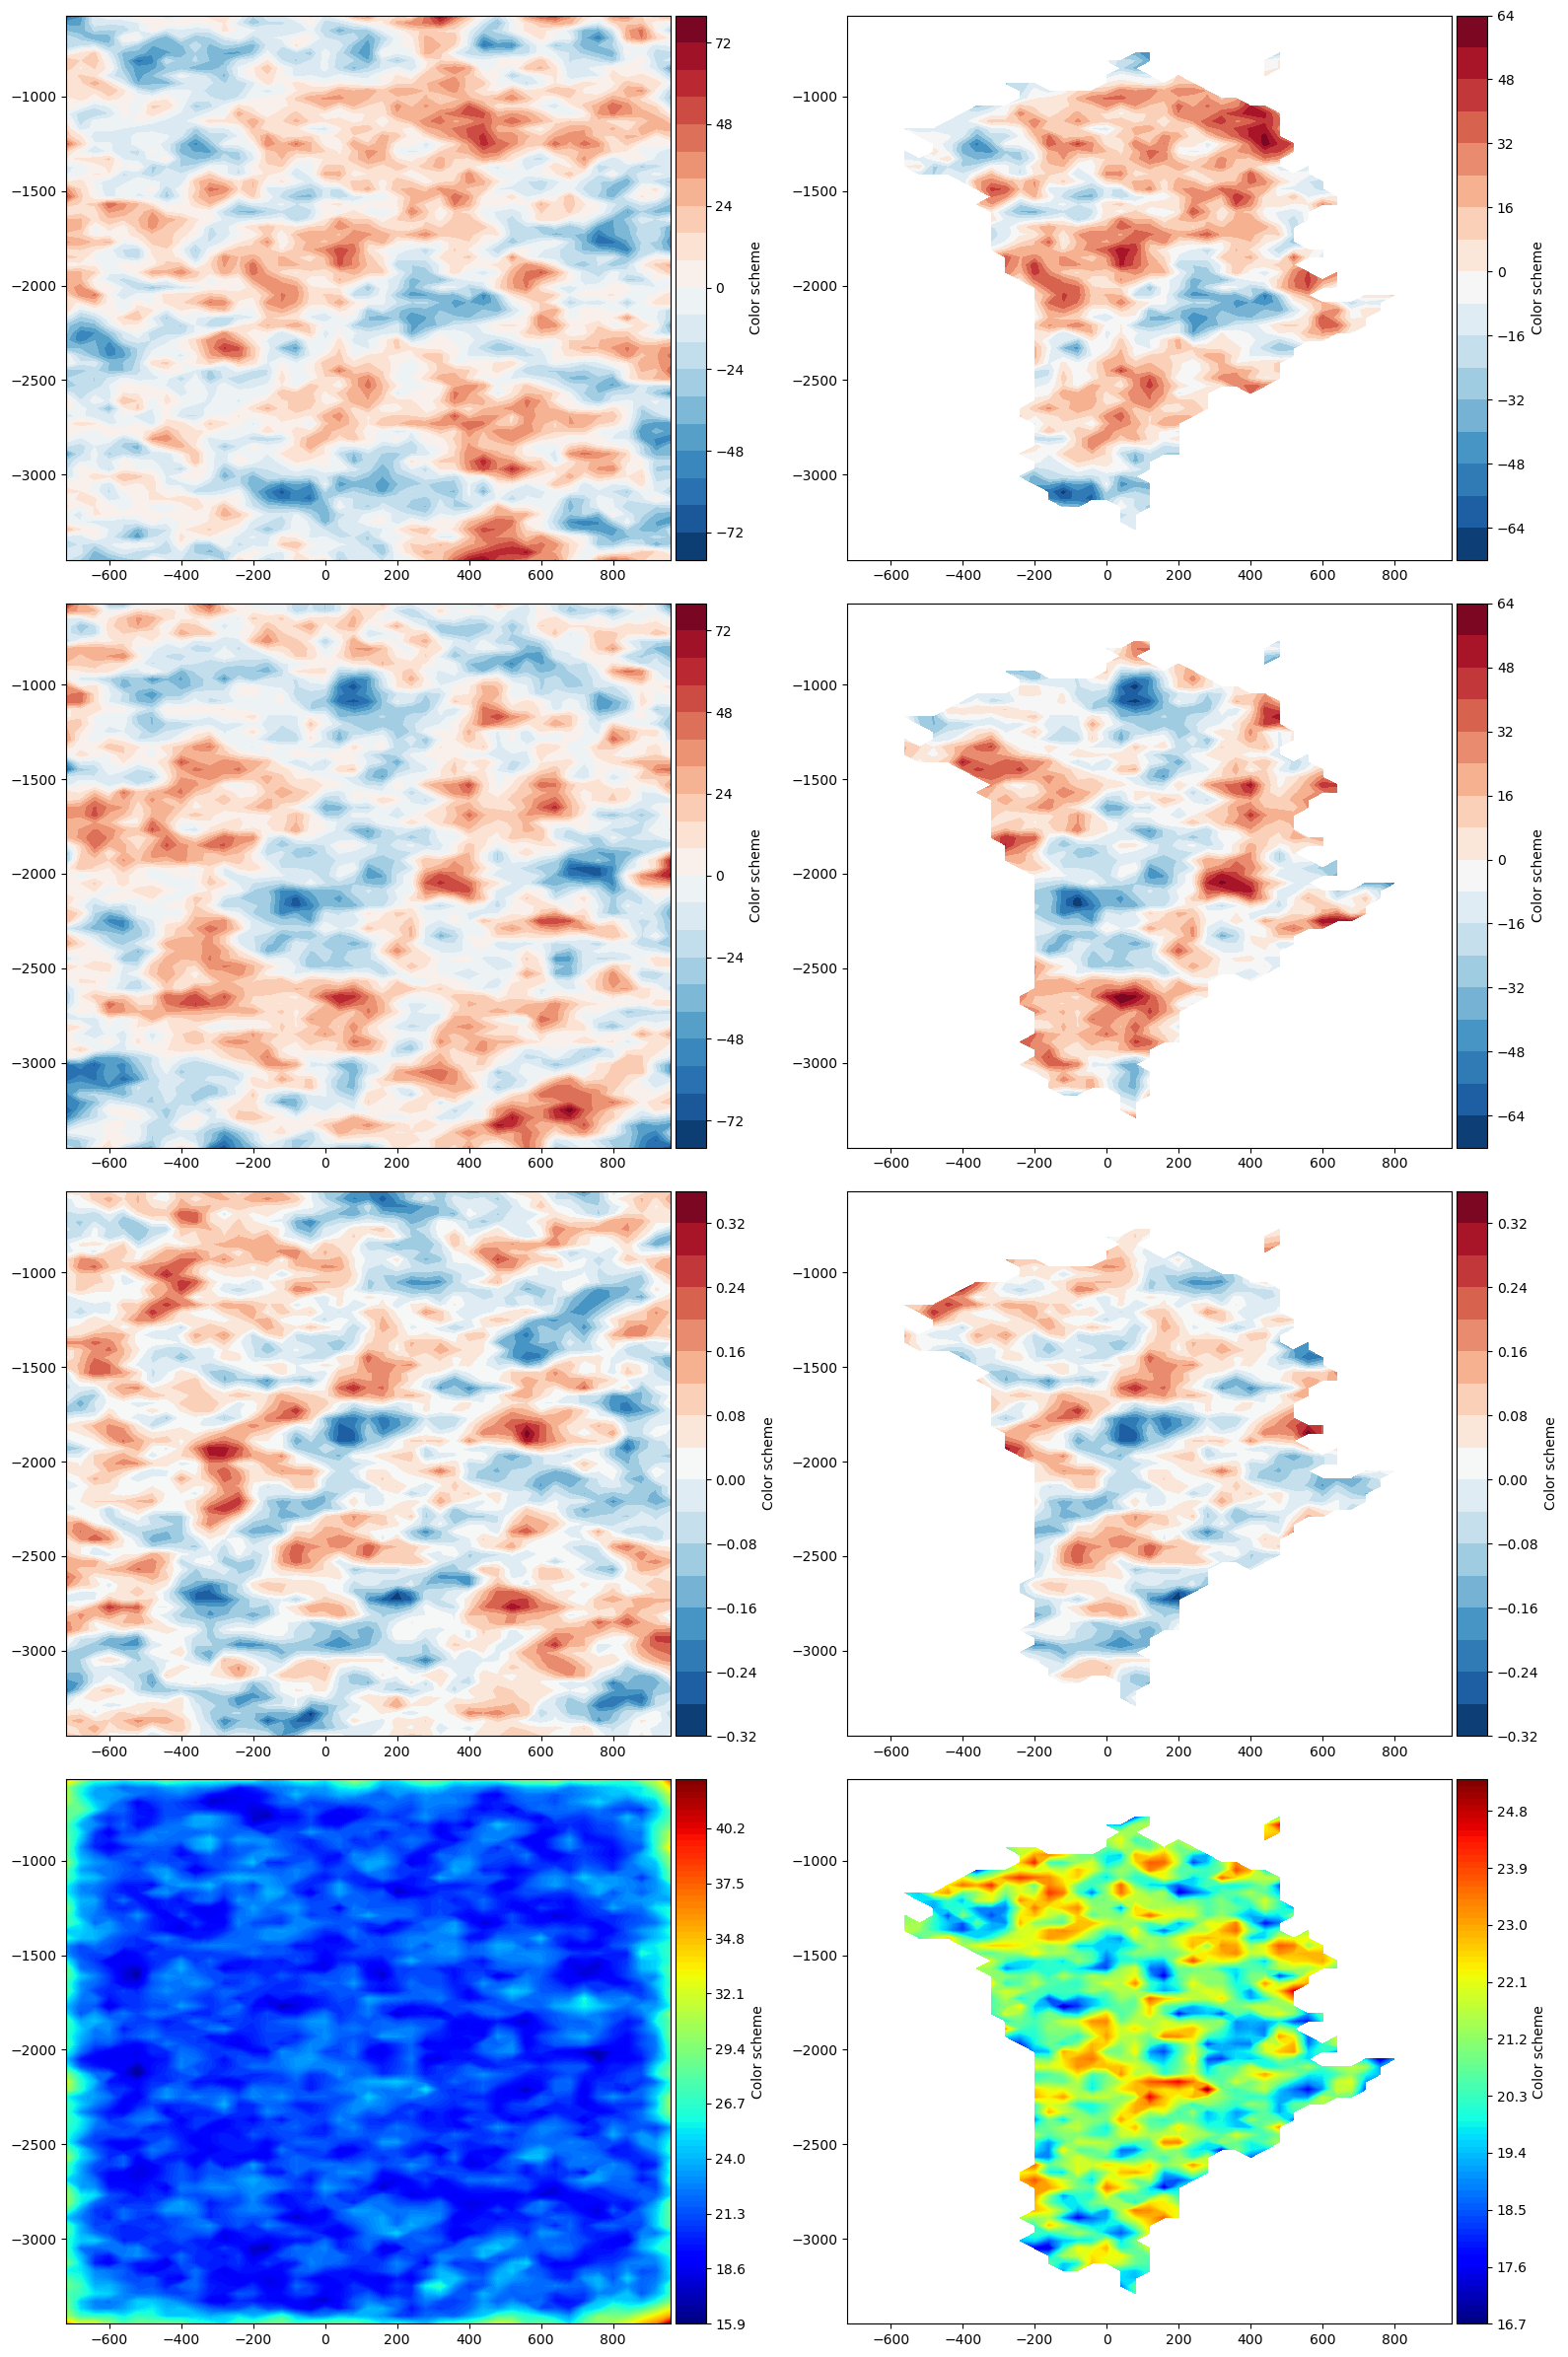

In [4]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_prior_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                            MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/tuneAll_mini", 100, None, "0002.nc")

ds_prior_X = DA.ds_prior_X.copy()

ds_subset_sample_prior_C_1 = DA.sample_prior_C()
ds_subset_sample_prior_C_2 = DA.sample_prior_C()
ds_mean_samples_prior_C, ds_std_samples_prior_C = DA.ds_prior_C_mean, DA.ds_prior_C_std

ds_subset_sample_prior_1 = DA.sample_prior()
ds_subset_sample_prior_2 = DA.sample_prior()
ds_mean_samples_prior, ds_std_samples_prior = DA.pointwise_marginals("prior", 100)

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_delta_tda_constd"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_delta_tda_constd"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_delta_tda_constd"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_delta_tda_constd"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_delta_tda_constd"].data/ds_std_samples_prior_C["xx_delta_tda_constd"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_delta_tda_constd"].data/ds_std_samples_prior_C["xx_delta_tda_constd"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_delta_tda_constd"].data,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_delta_tda_constd"].data*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

In [5]:
ds_prior_X

<xarray.Dataset> Size: 7MB
Dimensions:              (y: 73, x: 43, zeta_c: 81, zeta_r: 41, time_ad: 6,
                          scalar: 1)
Coordinates:
  * y                    (y) float64 584B -3.45e+03 -3.41e+03 ... -610.0 -570.0
  * x                    (x) float64 344B -720.0 -680.0 -640.0 ... 920.0 960.0
  * zeta_c               (zeta_c) float64 648B 0.0 0.003962 ... 0.9714 1.0
  * zeta_r               (zeta_r) float64 328B 0.0 0.025 0.05 ... 0.95 0.975 1.0
  * time_ad              (time_ad) float64 48B 0.0 1.0 2.0 3.0 4.0 5.0
Dimensions without coordinates: scalar
Data variables: (12/18)
    xx_delta_tda_constd  (y, x) float64 25kB 0.02815 0.03108 ... 0.03182 0.02684
    xx_c_dis_dad         (scalar) float64 8B 39.3
    xx_gamma_sd          (y, x) float64 25kB 0.02988 0.03214 ... 0.02862 0.02309
    xx_s_statd           (scalar) float64 8B 38.34
    xx_beta1d            (scalar) float64 8B 42.11
    xx_beta2d            (scalar) float64 8B 38.64
    ...                   ...
    xx_zld               (y, x) float64 25kB 0.02779 0.03369 ... 0.0327 0.02765
    xx_temp_cd           (zeta_c, y, x) float64 2MB 55.57 64.73 ... 176.3 150.8
    xx_omega_cd          (zeta_c, y, x) float64 2MB 67.31 64.78 ... 169.3 164.0
    xx_age_cd            (zeta_c, y, x) float64 2MB 70.03 64.39 ... 182.1 155.7
    xx_temp_rd           (zeta_r, y, x) float64 1MB 166.2 151.8 ... 149.5 150.0
    xx_delta_tdad        (time_ad, y, x) float64 151kB 0.02696 ... 0.03165

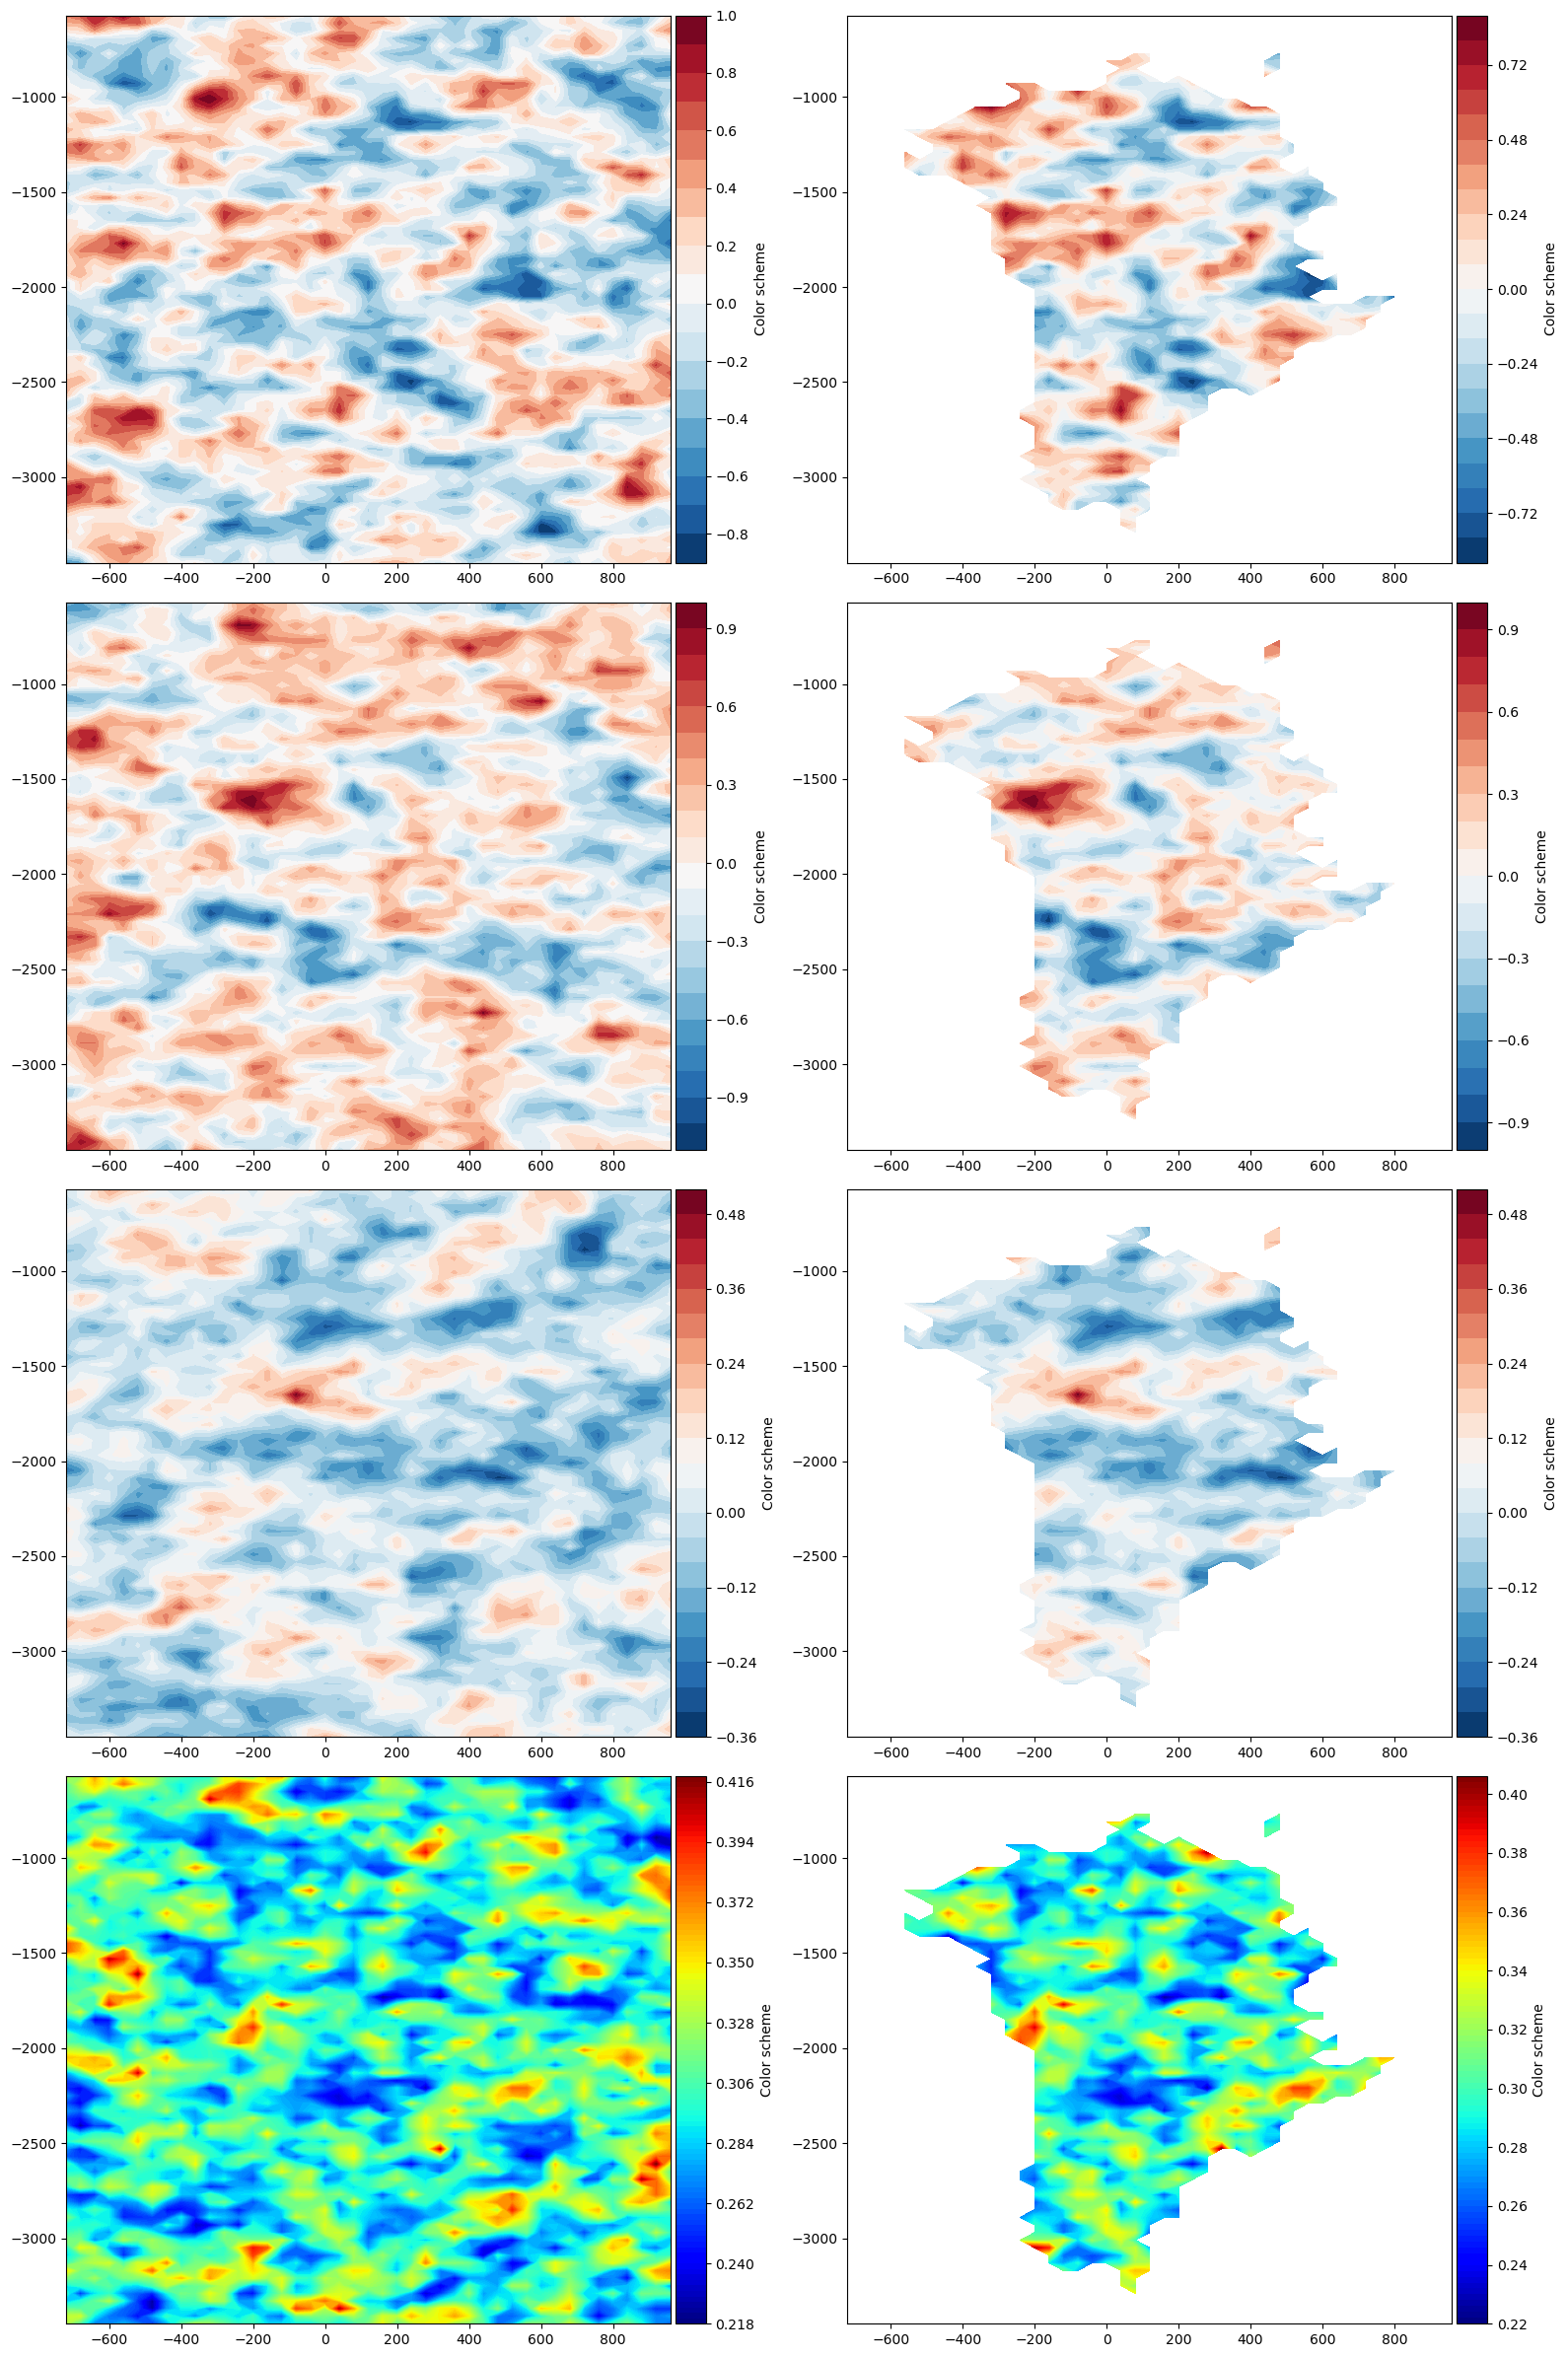

In [6]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_delta_tda_constd"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_delta_tda_constd"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_delta_tda_constd"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_delta_tda_constd"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_delta_tda_constd"].data/ds_std_samples_prior["xx_delta_tda_constd"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_delta_tda_constd"].data/ds_std_samples_prior["xx_delta_tda_constd"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_delta_tda_constd"].data,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_delta_tda_constd"].data*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

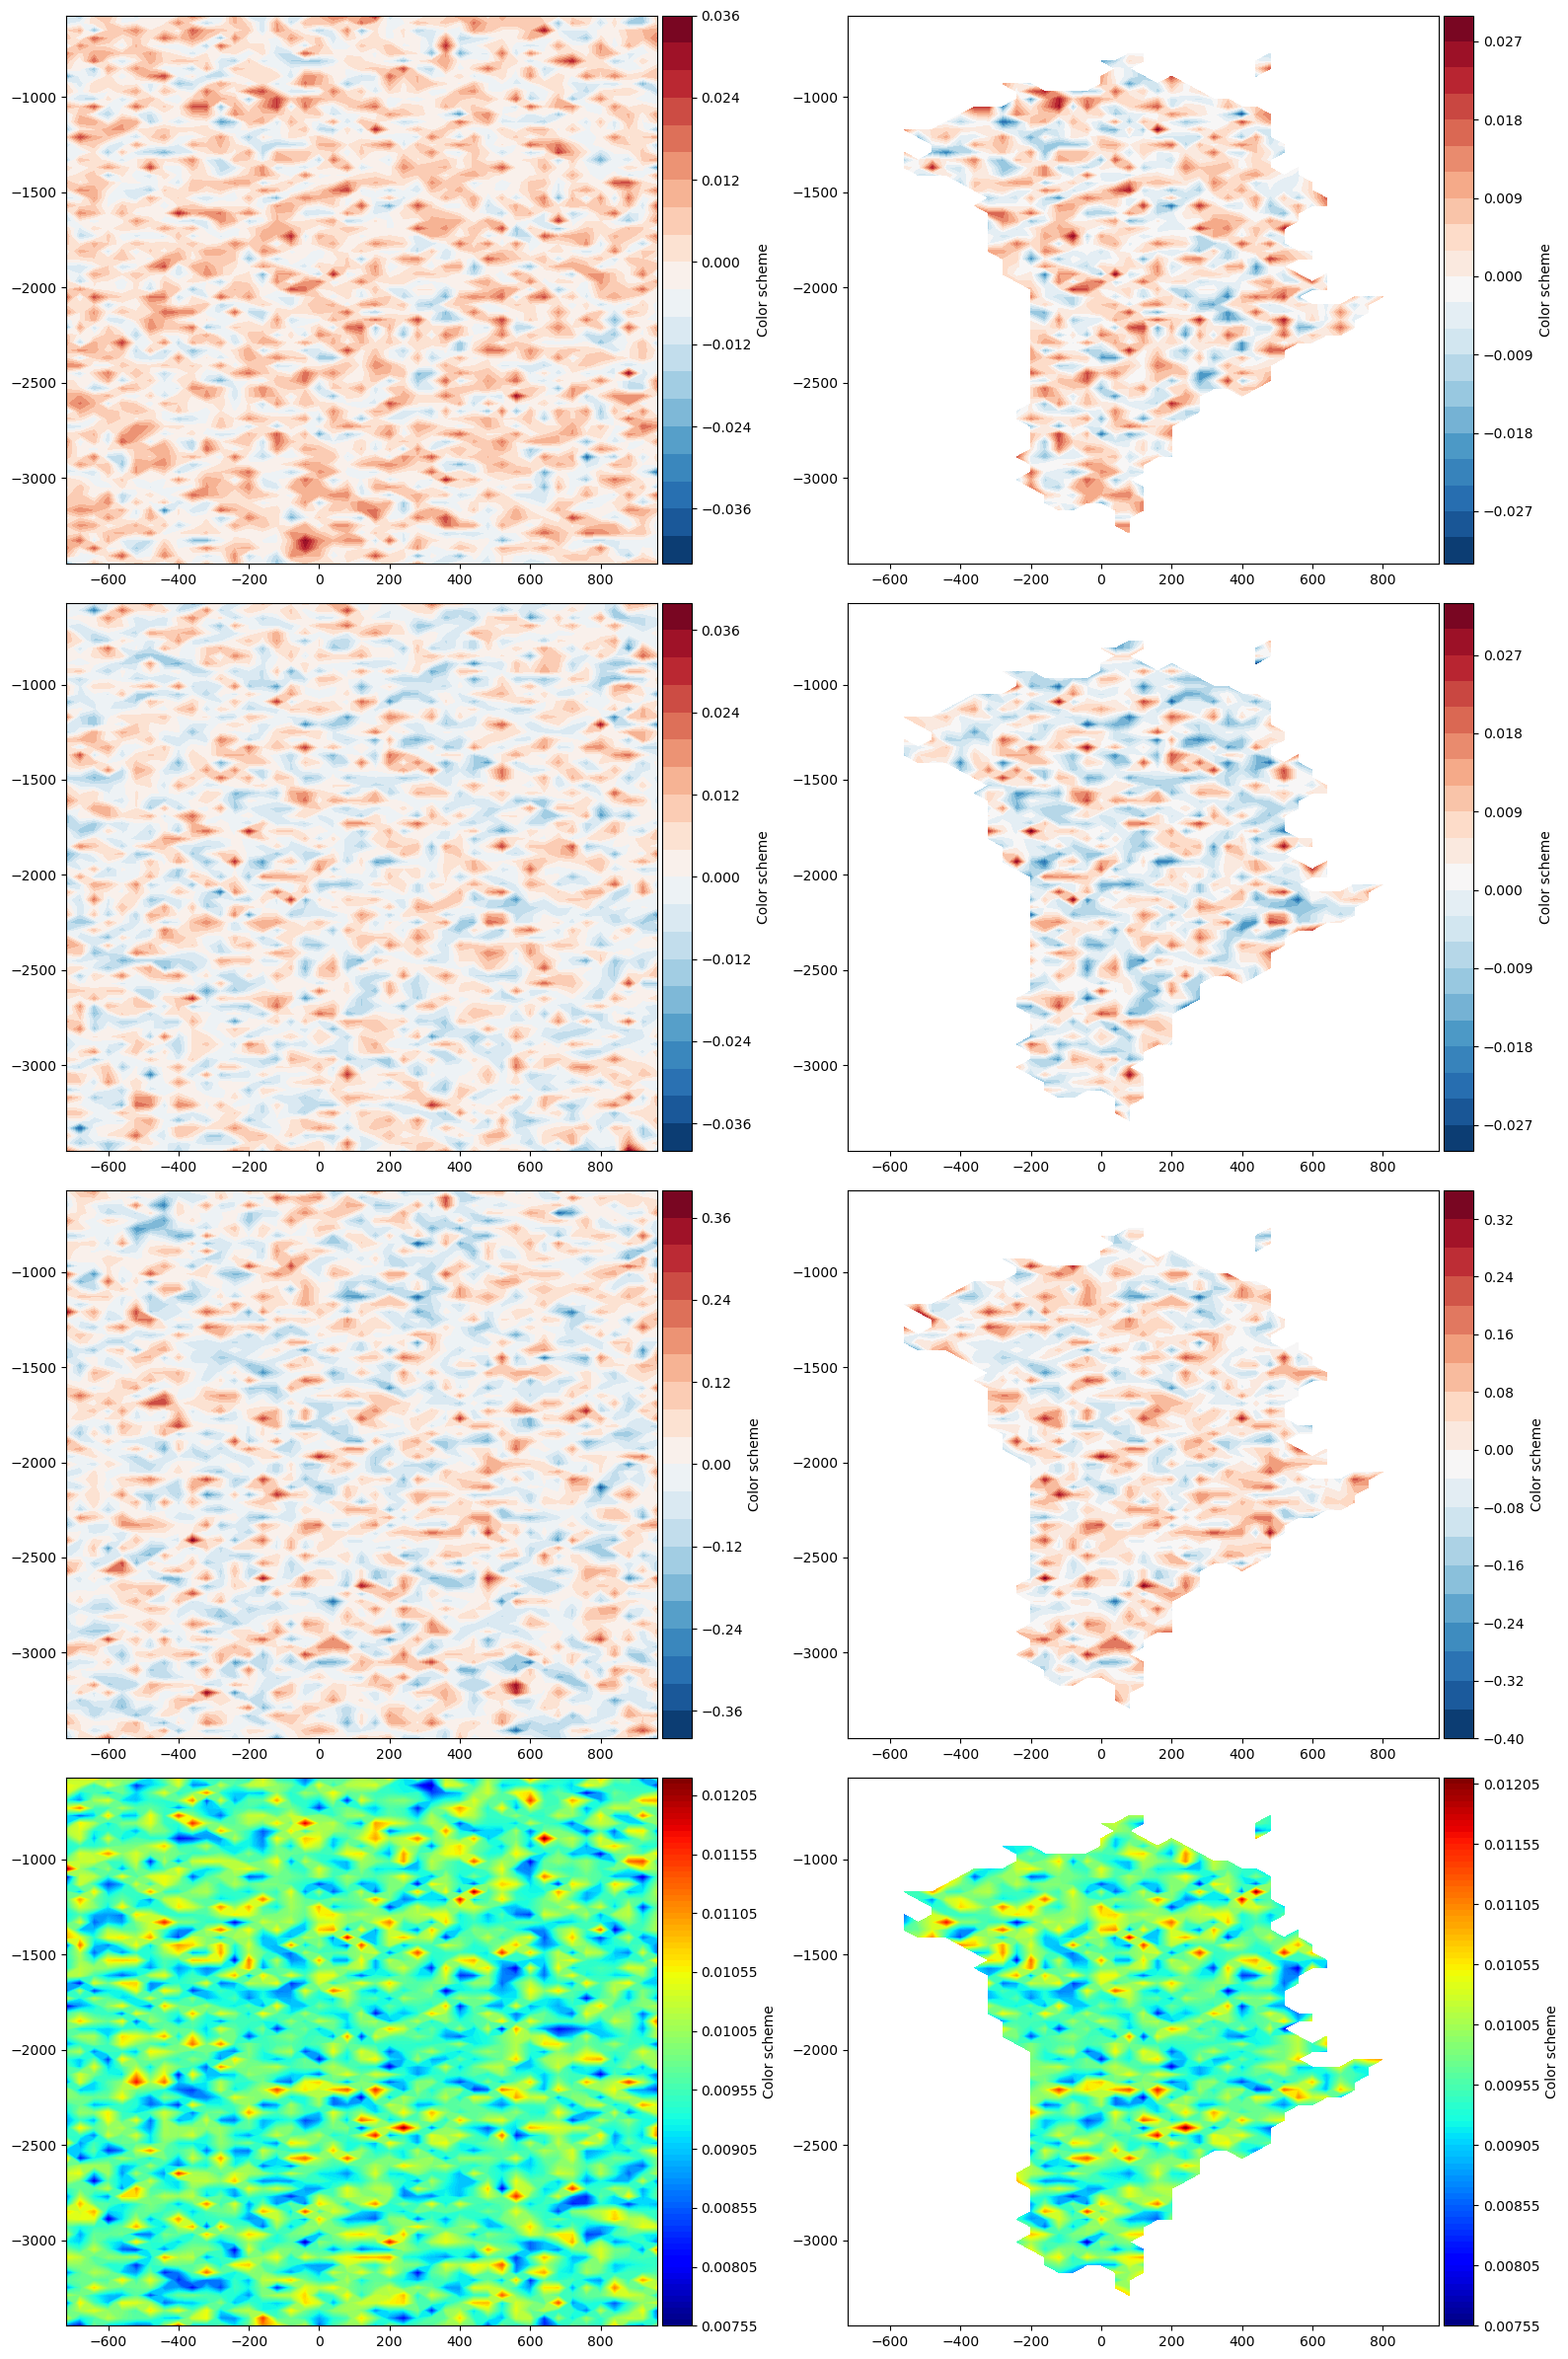

In [7]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_age_cd"].data[40]/ds_std_samples_prior_C["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_age_cd"].data[40]/ds_std_samples_prior_C["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_age_cd"].data[40],
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_age_cd"].data[40]*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

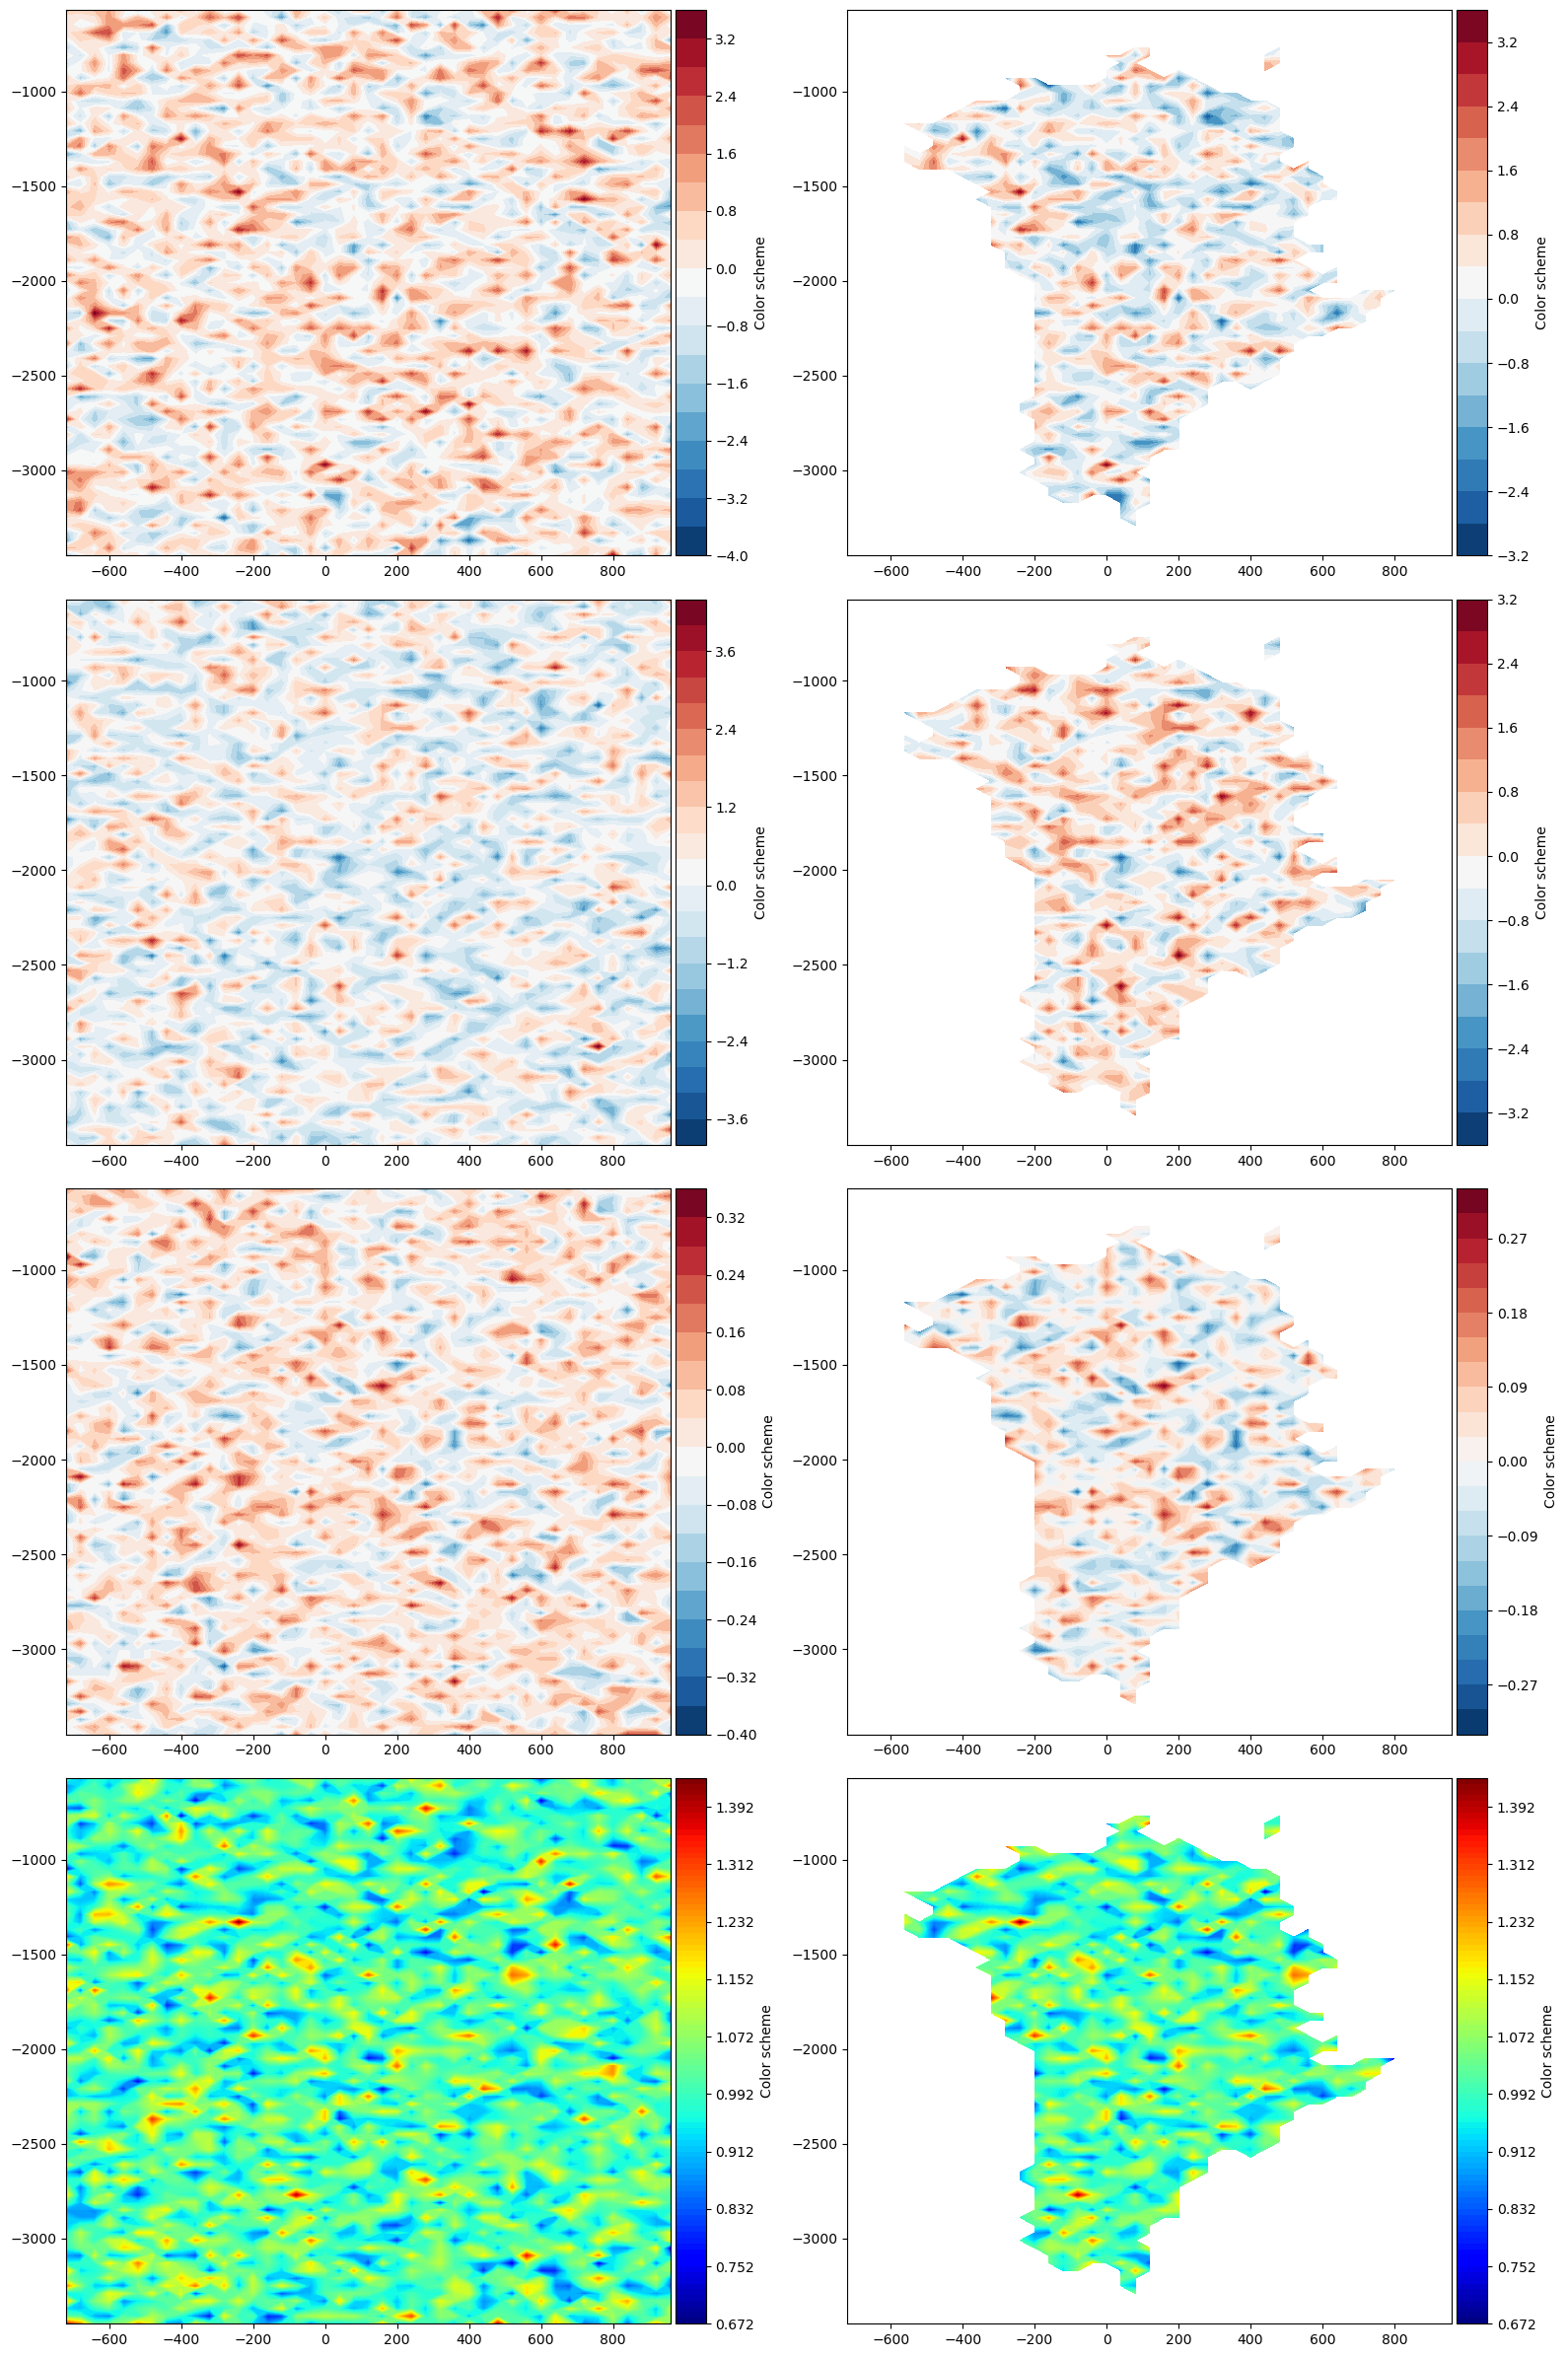

In [8]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_age_cd"].data[40]/ds_std_samples_prior["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_age_cd"].data[40]/ds_std_samples_prior["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_age_cd"].data[40],
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_age_cd"].data[40]*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

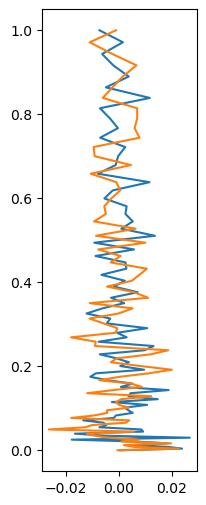

In [9]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_subset_sample_prior_C_1["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
plt.plot(ds_subset_sample_prior_C_2["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

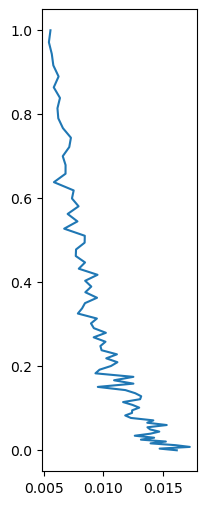

In [10]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_std_samples_prior_C["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

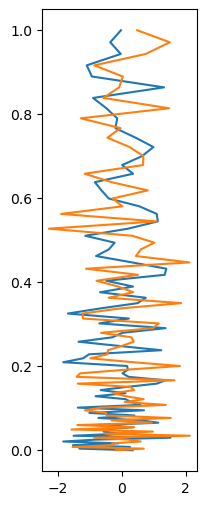

In [11]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_subset_sample_prior_1["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
plt.plot(ds_subset_sample_prior_2["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

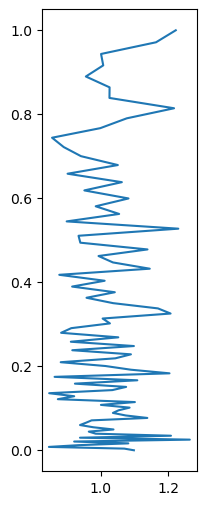

In [12]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_std_samples_prior["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

In [13]:
ds_x = DA.create_ad_tlm_action_input_nc(bool_randomize = True)
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(5812258.114320342, 5812258.114320345)

In [14]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(5812258.114320342, 5812258.114320345)

In [15]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

ds_SigmaXCx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_tlm_action = "tlm_action")
ds_A_SigmaXCx = DA.eval_tlm_action()
ds_noise_cov_inv_A_SigmaXCx = DA.eval_noise_cov_inv_action(ds_A_SigmaXCx)

dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)

ds_CT_XT_SigmaT_H_misfit_SigmaXCx = DA.eval_prior_preconditioned_misfit_hessian_action()

DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_misfit_SigmaXCx], ["tlm", "adj"]), DA.l2_inner_product([ds_A_SigmaXCx, ds_noise_cov_inv_A_SigmaXCx], ["tlmhessaction", "adjhessaction"])

(7747801.459379184, 7747801.459379184)

In [16]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_SigmaXCx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_tlm_action = "tlm_action")
ds_SigmaXC_inv_SigmaXCx = DA.eval_sqrt_prior_cov_inv_action()

DA.l2_inner_product([ds_SigmaXC_inv_SigmaXCx, ds_SigmaXC_inv_SigmaXCx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x, ds_x], ["tlm", "tlm"])

(925637.800791737, 925637.800791737)

In [17]:
DA.l2_inner_product([ds_SigmaXCx, ds_SigmaXCx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x, ds_x], ["tlm", "tlm"])

(6519101214.276615, 925637.800791737)

In [18]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()

ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_SigmaXCx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_tlm_action = "tlm_action")

ds_SigmaXCx_as_adj_fields = xr.open_dataset(DA.dict_ad_inp_nc_files["tlm_action"])
ds_SigmaXCx_as_adj_fields = ds_SigmaXCx_as_adj_fields.rename({field + "d": field + "b" for field in dict_og_params_fields_vals})
for var in ds_SigmaXCx_as_adj_fields:
    if ds_SigmaXCx_as_adj_fields[var].attrs["type"] == "tlm":
        ds_SigmaXCx_as_adj_fields[var].attrs["type"] = "adj"
        if dict_params_fields_or_scalars[var[:-1]] == "scalar" and dict_params_fields_num_dims[var[:-1]] == "2D":
            ds_SigmaXCx_as_adj_fields[var].data[:, :] = ds_SigmaXCx_as_adj_fields[var].data.flat[0]/((IMAX+1)*(JMAX+1))
        elif dict_params_fields_or_scalars[var[:-1]] == "scalar" and dict_params_fields_num_dims[var[:-1]] == "3D":
            ds_SigmaXCx_as_adj_fields[var].data[:, :] = ds_SigmaXCx_as_adj_fields[var].data.flat[0]/((IMAX+1)*(JMAX+1)*(KCMAX+1))
        elif dict_params_fields_or_scalars[var[:-1]] == "scalar" and dict_params_fields_num_dims[var[:-1]] == "3DR":
            ds_SigmaXCx_as_adj_fields[var].data[:, :] = ds_SigmaXCx_as_adj_fields[var].data.flat[0]/((IMAX+1)*(JMAX+1)*(KRMAX+1))
ds_SigmaXCx_as_adj_fields.to_netcdf(DA.dict_ad_out_nc_files["adj_action"])

ds_CT_XT_SigmaT_SigmaXCx = DA.eval_sqrt_prior_covT_action(ad_key_adj_or_adj_action = "adj_action")

DA.l2_inner_product([ds_SigmaXCx, ds_SigmaXCx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_SigmaXCx], ["tlm", "adj"])

(6519101214.276615, 6519101214.276616)

In [19]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_CT_XT_SigmaT_H_SigmaXCx = DA.eval_prior_preconditioned_hessian_action()

DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_misfit_SigmaXCx], ["tlm", "adj"]), \
DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_misfit_SigmaXCx], ["tlm", "adj"]) + DA.l2_inner_product([ds_x, ds_x], ["tlm", "tlm"]), \
DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_SigmaXCx], ["tlm", "adj"])

(7747801.459379184, 8673439.260170922, 8673439.260170922)

In [20]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_prior_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                            MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/tuneAll_mini", None, ds_prior_X, "0002.nc")

DA.gradient_descent(1)

---------------------------------------------------------------------------------------------------------------
iter 0, fc = 365152.15960246866, fc_data = 365152.15960246866, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Step size alpha = 0.001953125
---------------------------------------------------------------------------------------------------------------
iter 1, fc = 178241.31298243237, fc_data = 175320.17639971807, fc_reg = 2921.1365827142963
---------------------------------------------------------------------------------------------------------------


<xarray.Dataset> Size: 7MB
Dimensions:             (y: 73, x: 43, scalar: 1, zeta_c: 81, zeta_r: 41,
                         time_ad: 6)
Coordinates:
  * y                   (y) float64 584B -3.45e+03 -3.41e+03 ... -610.0 -570.0
  * x                   (x) float64 344B -720.0 -680.0 -640.0 ... 920.0 960.0
  * zeta_c              (zeta_c) float64 648B 0.0 0.003962 ... 0.9714 1.0
  * zeta_r              (zeta_r) float64 328B 0.0 0.025 0.05 ... 0.95 0.975 1.0
  * time_ad             (time_ad) float64 48B 0.0 1.0 2.0 3.0 4.0 5.0
Dimensions without coordinates: scalar
Data variables: (12/20)
    xx_c_slide_init     (y, x) float64 25kB -0.07058 -0.07058 ... -0.07058
    xx_delta_tda_const  (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_c_dis_da         (scalar) float64 8B 5.985
    xx_q_geo            (y, x) float32 13kB -1.286 -1.28 ... -1.145 -1.146
    xx_gamma_s          (y, x) float64 25kB -1.152 -1.152 ... -1.152 -1.152
    xx_s_stat           (scalar) float64 8B 1.035
    ...                  ...
    xx_zl               (y, x) float64 25kB -6.147e-08 -6.204e-08 ... -6.151e-08
    xx_temp_c           (zeta_c, y, x) float64 2MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_omega_c          (zeta_c, y, x) float64 2MB -5.0 -5.0 -5.0 ... -5.0 -5.0
    xx_age_c            (zeta_c, y, x) float64 2MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_temp_r           (zeta_r, y, x) float64 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_delta_tda        (time_ad, y, x) float64 151kB 0.0 0.0 0.0 ... 0.0 0.0

In [21]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_prior_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                            MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/tuneAll_mini", None, ds_prior_X, "0002.nc")

DA.inexact_gn_hessian_cg(MAX_ITERS=5, init_alpha_gd = 1.e-6)

---------------------------------------------------------------------------------------------------------------
Initial fc = 365152.15960246866, fc_data = 365152.15960246866, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
CG iter 1
eps_TOL_CG: 62136.30550063009, norm_r_hat: 36690.80388171075
conjugate_gradient: Convergence.
Angle between p_hat and g_hat in degrees:  179.99999879258172
Step size alpha = 1.0
---------------------------------------------------------------------------------------------------------------
Outer iter 1, fc = 249836.9533999589, fc_data = 249835.27177360308, fc_reg = 1.6816263558243756
---------------------------------------------------------------------------------------------------------------
CG iter 1
eps_TOL_CG: 16112.968406465963, norm_r_hat: 27082.229482916304
CG iter 2
H-orthogonality angles (deg): v_old_1: 90.0/90.0
eps_TOL_CG: 16112.968406465963, norm_r_hat: 29003.7960871781

KeyboardInterrupt: 

In [ ]:
# start_dp = time.time()

# Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(15, 5, mode = "misfit_prior_precond", str_pass = "double_precise")
# Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(15, 5, mode = "misfit_prior_precond", str_pass = "double_precise", 
#                                                                                                               Omega = Omega_misfit_dp, Y = Y_misfit_dp, Q = Q_misfit_dp, MQ = MQ_misfit_dp)

# end_dp = time.time()
# print(f"Double precise total time: {end_dp - start_dp:.4f} seconds")
# start_sa = time.time()

# Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(20, 5, mode = "misfit_prior_precond", str_pass = "single_approx")
# Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(20, 5, mode = "misfit_prior_precond", str_pass = "single_approx", 
#                                                                                                               Omega = Omega_misfit_sa, Y = Y_misfit_sa, Q = Q_misfit_sa, MQ = MQ_misfit_sa)

# end_sa = time.time()
# print(f"Single approx total time: {end_sa - start_sa:.4f} seconds")

# plt.scatter(np.arange(Lambda_misfit_dp.shape[0]), np.sort(Lambda_misfit_dp)[::-1], color = "blue")
# plt.plot(np.sort(Lambda_misfit_dp)[::-1], color = "blue")
# plt.scatter(np.arange(Lambda_misfit_sa.shape[0]), np.sort(Lambda_misfit_sa)[::-1], color = "red")
# plt.plot(np.sort(Lambda_misfit_sa)[::-1], color = "red")

# plt.axhline(1, color = "green")

# np.sort(Lambda_misfit_dp)[::-1], np.sort(Lambda_misfit_sa)[::-1]

In [ ]:
# start_dp = time.time()

# Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(15, 5, mode = "misfit_prior_precond", str_pass = "double_precise")
# Omega_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/Omega_misfit.npy")
# Y_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/Y_misfit.npy")
# Q_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/Q_misfit.npy")
# MQ_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/MQ_misfit.npy")
# Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(15, 5, mode = "misfit_prior_precond", str_pass = "double_precise", 
#                                                                                                               Omega = Omega_misfit_dp, Y = Y_misfit_dp, Q = Q_misfit_dp, MQ = MQ_misfit_dp)

# end_dp = time.time()
# print(f"Double precise total time: {end_dp - start_dp:.4f} seconds")
# start_sa = time.time()

# Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(20, 5, mode = "misfit_prior_precond", str_pass = "single_approx")
# Omega_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/Omega_misfit.npy")
# Y_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/Y_misfit.npy")
# Q_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/Q_misfit.npy")
# MQ_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/MQ_misfit.npy")
# Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(20, 5, mode = "misfit_prior_precond", str_pass = "single_approx", 
#                                                                                                               Omega = Omega_misfit_sa, Y = Y_misfit_sa, Q = Q_misfit_sa, MQ = MQ_misfit_sa)

# end_sa = time.time()
# print(f"Single approx total time: {end_sa - start_sa:.4f} seconds")

# plt.scatter(np.arange(Lambda_misfit_dp.shape[0]), np.sort(Lambda_misfit_dp)[::-1], color = "blue")
# plt.plot(np.sort(Lambda_misfit_dp)[::-1], color = "blue")
# plt.scatter(np.arange(Lambda_misfit_sa.shape[0]), np.sort(Lambda_misfit_sa)[::-1], color = "red")
# plt.plot(np.sort(Lambda_misfit_sa)[::-1], color = "red")

# plt.axhline(1, color = "green")

# np.sort(Lambda_misfit_dp)[::-1], np.sort(Lambda_misfit_sa)[::-1]

In [ ]:
start_dp = time.time()
Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(50, 5, mode = "misfit_prior_precond", str_pass = "double_precise")

end_dp = time.time()
print(f"Double precise total time: {end_dp - start_dp:.4f} seconds")
start_sa = time.time()

Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(50, 5, mode = "misfit_prior_precond", str_pass = "single_approx")

end_sa = time.time()
print(f"Single approx total time: {end_sa - start_sa:.4f} seconds")

plt.scatter(np.arange(Lambda_misfit_dp.shape[0]), np.sort(Lambda_misfit_dp)[::-1], color = "blue")
plt.plot(np.sort(Lambda_misfit_dp)[::-1], color = "blue")
plt.scatter(np.arange(Lambda_misfit_sa.shape[0]), np.sort(Lambda_misfit_sa)[::-1], color = "red")
plt.plot(np.sort(Lambda_misfit_sa)[::-1], color = "red")

plt.axhline(1, color = "green")

np.sort(Lambda_misfit_dp)[::-1], np.sort(Lambda_misfit_sa)[::-1]

In [ ]:
# ds_state = xr.open_dataset("/scratch2/shreyas/tuneAll_mini/inexact_gn_hessian_cg/state_GNHessCG_iter_2.nc")
# ds_prior_X = xr.open_dataset("/scratch2/shreyas/tuneAll_mini/prior_X.nc")

# dict_og_params_fields_vals = {"xx_c_slide_init": ds_state["xx_c_slide_init"].data.copy(),
#                               "xx_delta_tda_const": ds_state["xx_delta_tda_const"].data.copy(),
#                               "xx_c_dis_da": ds_state["xx_c_dis_da"].data[0].copy(),
#                               "xx_q_geo": ds_state["xx_q_geo"].data.copy(),
#                               "xx_gamma_s": ds_state["xx_gamma_s"].data.copy(),
#                               "xx_s_stat": ds_state["xx_s_stat"].data[0].copy(),
#                               "xx_beta1": ds_state["xx_beta1"].data[0].copy(),
#                               "xx_beta2": ds_state["xx_beta2"].data[0].copy(),
#                               "xx_Pmax": ds_state["xx_Pmax"].data[0].copy(),
#                               "xx_mu": ds_state["xx_mu"].data[0].copy(),
#                               "xx_RHO_A": ds_state["xx_RHO_A"].data[0].copy(),
#                               "xx_time_lag_asth": ds_state["xx_time_lag_asth"].data[0].copy(),
#                               "xx_flex_rig_lith": ds_state["xx_flex_rig_lith"].data.copy(),
#                               "xx_zs": ds_state["xx_zs"].data.copy(),
#                               "xx_zl": ds_state["xx_zl"].data.copy(),
#                               "xx_temp_c": ds_state["xx_temp_c"].data.copy(),
#                               "xx_omega_c": ds_state["xx_omega_c"].data.copy(),
#                               "xx_age_c": ds_state["xx_age_c"].data.copy(),
#                               "xx_temp_r": ds_state["xx_temp_r"].data.copy(),
#                               "xx_delta_tda": ds_state["xx_delta_tda"].data.copy()}

# DA = optim.DataAssimilation(sicopolis_dir, simulation,
#                             dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
#                             dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
#                             dict_og_params_fields_vals, dict_prior_params_fields_vals, dict_params_fields_num_dims, 
#                             dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
#                             dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
#                             MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/tuneAll_mini", None, ds_prior_X, "0002.nc")

# start_dp = time.time()

# Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(15, 5, mode = "misfit_prior_precond", str_pass = "double_precise")
# Omega_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/Omega_misfit.npy")
# Y_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/Y_misfit.npy")
# Q_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/Q_misfit.npy")
# MQ_misfit_dp = np.load("/scratch2/shreyas/tuneAll_mini/REVD_double_precise/MQ_misfit.npy")
# Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(15, 5, mode = "misfit_prior_precond", str_pass = "double_precise", 
#                                                                                                               Omega = Omega_misfit_dp, Y = Y_misfit_dp, Q = Q_misfit_dp, MQ = MQ_misfit_dp)

# end_dp = time.time()
# print(f"Double precise total time: {end_dp - start_dp:.4f} seconds")
# start_sa = time.time()

# Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(20, 5, mode = "misfit_prior_precond", str_pass = "single_approx")
# Omega_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/Omega_misfit.npy")
# Y_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/Y_misfit.npy")
# Q_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/Q_misfit.npy")
# MQ_misfit_sa = np.load("/scratch2/shreyas/tuneAll_mini/REVD_single_approx/MQ_misfit.npy")
# Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(20, 5, mode = "misfit_prior_precond", str_pass = "single_approx", 
#                                                                                                               Omega = Omega_misfit_sa, Y = Y_misfit_sa, Q = Q_misfit_sa, MQ = MQ_misfit_sa)

# end_sa = time.time()
# print(f"Single approx total time: {end_sa - start_sa:.4f} seconds")

# plt.scatter(np.arange(Lambda_misfit_dp.shape[0]), np.sort(Lambda_misfit_dp)[::-1], color = "blue")
# plt.plot(np.sort(Lambda_misfit_dp)[::-1], color = "blue")
# plt.scatter(np.arange(Lambda_misfit_sa.shape[0]), np.sort(Lambda_misfit_sa)[::-1], color = "red")
# plt.plot(np.sort(Lambda_misfit_sa)[::-1], color = "red")

# plt.axhline(1, color = "green")

# np.sort(Lambda_misfit_dp)[::-1], np.sort(Lambda_misfit_sa)[::-1]

In [ ]:
start_dp = time.time()
Omega_misfit_dp, Y_misfit_dp, Q_misfit_dp, MQ_misfit_dp, U_misfit_dp, Lambda_misfit_dp, S_misfit_dp = DA.revd(250, 10, mode = "misfit_prior_precond", str_pass = "double_precise")

end_dp = time.time()
print(f"Double precise total time: {end_dp - start_dp:.4f} seconds")
start_sa = time.time()

Omega_misfit_sa, Y_misfit_sa, Q_misfit_sa, MQ_misfit_sa, U_misfit_sa, Lambda_misfit_sa, S_misfit_sa = DA.revd(250, 10, mode = "misfit_prior_precond", str_pass = "single_approx")

end_sa = time.time()
print(f"Single approx total time: {end_sa - start_sa:.4f} seconds")

plt.scatter(np.arange(Lambda_misfit_dp.shape[0]), np.sort(Lambda_misfit_dp)[::-1], color = "blue")
plt.plot(np.sort(Lambda_misfit_dp)[::-1], color = "blue")
plt.scatter(np.arange(Lambda_misfit_sa.shape[0]), np.sort(Lambda_misfit_sa)[::-1], color = "red")
plt.plot(np.sort(Lambda_misfit_sa)[::-1], color = "red")

plt.axhline(1, color = "green")

np.sort(Lambda_misfit_dp)[::-1], np.sort(Lambda_misfit_sa)[::-1]

In [ ]:
sigma_B_squared_dp, sigma_P_squared_dp, delta_sigma_qoi_squared_dp = DA.forward_uq_propagation(U_misfit_dp, Lambda_misfit_dp)
sigma_B_squared_sa, sigma_P_squared_sa, delta_sigma_qoi_squared_sa = DA.forward_uq_propagation(U_misfit_sa, Lambda_misfit_sa)

sigma_B_squared_dp, sigma_P_squared_dp, delta_sigma_qoi_squared_dp, sigma_B_squared_sa, sigma_P_squared_sa, delta_sigma_qoi_squared_sa

In [ ]:
# DA = optim.DataAssimilation(sicopolis_dir, simulation,
#                             dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
#                             dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
#                             dict_og_params_fields_vals, dict_prior_params_fields_vals, dict_params_fields_num_dims, 
#                             dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables, 
#                             dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas, 
#                             MAX_ITERS_SOR, OMEGA_SOR, None, True, "0002.nc", "/scratch2/shreyas/temp_dir", None, ds_prior_X, "0002.nc")

# DA.l_bfgs(5, 3)